
# Le vélo: tour d'horizon 


(Sujet conçu et rédigé par Nathalie Jedrecy)

&ensp;&ensp;&ensp; Chacun, chacune d'entre nous a déjà - au moins une fois dans sa vie - enfourché une bicyclette. 
Il est d'usage de parler de "petite reine" pour qualifier cette dernière, et plus communément de vélo. 
Que ce soit pour le loisir ou la compétition, le cyclisme est un sport universel.
L'étude proposée décline quelques aspects liés à la pratique du vélo, avec un regard de physicien-ne.
Elle s'est inspirée de l'excellent site consacré au vélo: http://www.velomath.fr
        
<font color='red'>   Note: les questions ****** pour aller plus loin ****** sont optionnelles (i.e. non obligatoires) ; ne les traitez qu'en seconde intention.
Les figures fournies dans le sujet (cf. fichier "Projet-VELO-Sujet_2022-23.pdf") ne sont pas reprises dans ce Notebook.
Il vous est conseillé de travailler avec ce sujet ouvert en parallèle afin de bénéficier d'une mise en forme bien plus agréable que celle du Notebook. </font>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Puissance dévelopée: analyse

Nous considérons le système {cycliste+vélo}, évoluant à vitesse constante sur un route de pente quelconque.
Nous adoptons les notations suivantes: 
    
    M: la masse du système {cycliste+vélo}
    g: l'accéleration de la pesanteur
    pente: la pente de la route (exprimée ici en %)
    v: la vitesse du système {cycliste+vélo} (exprimée ici en km/h)
    P: la puissance développée par le cycliste 
                  
Dans un modèle simplifié où interviennent la résistance de l'air et les frottements des pneus 
sur la route, la puissance P (en unités S.I.) peut s'écrire: 

&ensp;&ensp;&ensp;&ensp;P = (beta + pente) M g v /360 + (250 / 11664) alpha v$^{3}$  &ensp;&ensp;&ensp;(1)
    

avec 

    beta: un coefficient qui rend compte du frottement de la route 
        sur les pneus (sans dimension)
    alpha: coefficient de résistance de l'air (unités S.I.)
   


**1-1.** Comment définit-on la pente "p" d'une route ? Que vaut "p" dans le cas d'une pente à 10 % (pente=10 dans l'expression (1))? Préciser les unités S.I. de P et alpha. 

**1-2.** Definir la fonction "Puissance(v,beta,pente,M,alpha)" puis tracer la courbe "Puissance(v)" pour M= 85 kg, beta=1 , alpha=0.2 S.I. et pente =0 . On prendra g = 10 $ms^{-2}$ et on considérera v variant entre 0 et 80 km/h, avec un pas de 4 km/h. Indiquer les unités sur le graphe et ajouter un titre précisant les valeurs des paramètres.

Text(0, 2000, 'M = 85kg, beta = 1, alpha = 0.2, pente = 0, g = 10 m.s**-2')

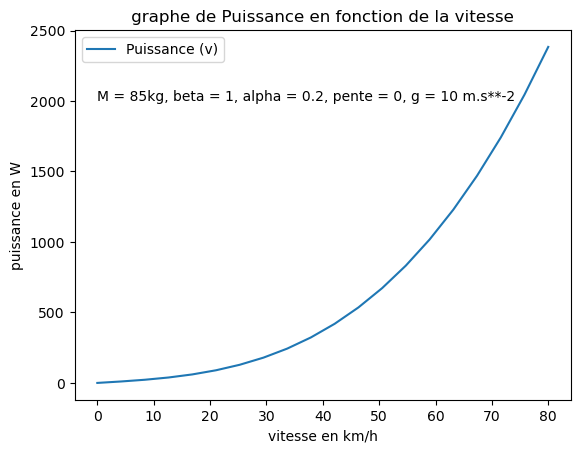

In [6]:
# fonction Puissance

# Affectation des variables
M = 85
beta = 1
alpha = 0.2
pente = 0
g = 10

#definition de la fonction
def puissance(v):
    P = ((beta + pente) * M * g * v) / 360 + ((250/11664) * alpha * v**3)  #Formule de la puissance en fonction de la vitesse
    return P

# tracé de la courbe

v = np.linspace(0,80,20)
plt.plot(v, puissance(v), label = "Puissance (v)")
plt.xlabel("vitesse en km/h")
plt.ylabel("puissance en W")
plt.title(" graphe de Puissance en fonction de la vitesse ")
plt.legend()
plt.text(0, 2000, "M = 85kg, beta = 1, alpha = 0.2, pente = 0, g = 10 m.s**-2")


**1-3.** Dans la réalité, pour un effort de l'ordre de 15 à 20 min, les meilleurs cyclistes mondiaux ne peuvent développer une puissance supérieure à 450 S.I. et une vitesse sur le plat de plus 45 km/h. Tracer une nouvelle figure de la puissance avec ces limites et représenter sur cette même figure la part de puissance dévolue à vaincre les frottements dus à la route (1er terme de (1), qui dépend du poids) et celle dévolue à vaincre la résistance due à l'air (2ème terme de (1)).
Déterminer la vitesse au delà de laquelle la résistance due à l'air devient prépondérante.

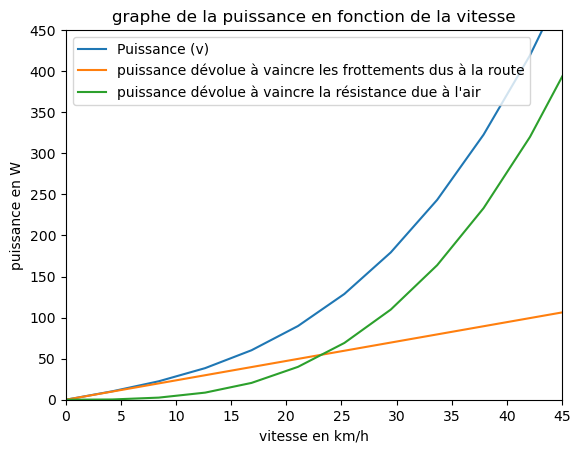

In [7]:
a = (beta + pente) * M * g * v / 360  # Formule du premier terme de la puissance ( frottements de la route )
b = (250/11664) * alpha * v**3 # Forumule du deuxieme terme de la puissance ( frottements de l'air )

plt.xlim(0,45)    # Limiter l'axe des abscisses
plt.ylim(0,450)   # Limiter l'axe des ordonnées

#Tracé des courbes
plt.plot(v, puissance(v), label = "Puissance (v)") #Courbe de la puissance en fonction de la vitesse
plt.plot(v, a, label = "puissance dévolue à vaincre les frottements dus à la route") #Courbe du premier terme de la puissance en fonction de la vitesse
plt.plot(v, b, label = "puissance dévolue à vaincre la résistance due à l'air") #Courbe du deuxieme terme de la puissance en fonction de la vitesse

plt.title("graphe de la puissance en fonction de la vitesse")
plt.xlabel("vitesse en km/h")
plt.ylabel("puissance en W")
plt.legend()


# la résistance de l'air devient prépondérante lorsque la vitesse équivaut à 24 km/h.

**1-4.** Faire un nouveau graphe de "Puissance(v)", considérant 3 valeurs possibles pour la pente: -6, 0, 6 %. On créera un tableau "Puissance(v, pente)". 
Commenter sur la signification d'une pente négative et sur les valeurs admissibles de la puissance dans ce cas.


[[   0.          -49.38761584  -96.85531271 -140.48317161 -178.35127358
  -208.53969962 -229.12853078 -238.19784805 -233.82773247 -214.09826505
  -177.08952682 -120.8815988   -43.554562     56.81150255  182.13651384
   334.34039084  515.34305252  727.06441788  971.42440589 1250.34293553]
 [   0.           10.26150696   22.44293291   38.46419681   60.24521765
    89.70591441  128.76620607  179.3460116   243.36524999  322.74384021
   419.40170125  535.25875208  672.23491169  832.25009905 1017.22423314
  1229.07723294 1469.72901744 1741.0995056  2045.10861642 2383.67626886]
 [   0.           69.91062977  141.74117852  217.41156523  298.84170888
   387.95152845  486.66094291  596.88987125  720.55823244  859.58594547
  1015.89292932 1191.39910296 1388.02438537 1607.68869554 1852.31195244
  2123.81407505 2424.11498235 2755.13459332 3118.79282694 3517.00960219]]


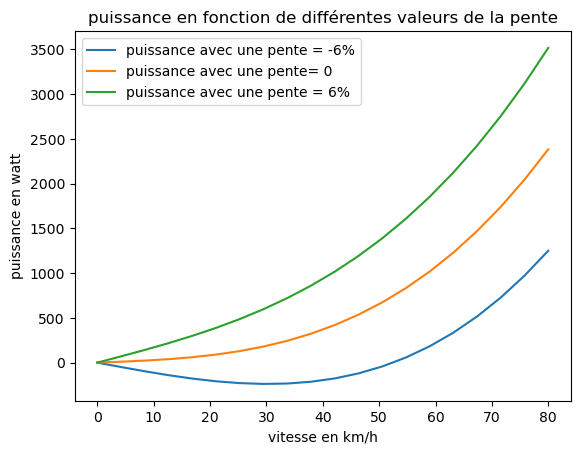

In [8]:
M = 85
beta = 1
alpha = 0.2
g = 10

a= ((beta -6) * M * g * v) / 360 + ((250/11664) * alpha * v**3) #puissance en fonction de la vitesse dans le cas d'une pente= -6%
   
b = ((beta + 0) * M * g * v) / 360 + ((250/11664) * alpha * v**3)#puissance en fonction de la vitesse dans le cas d'une pente= 0%
    
c = ((beta + 6) * M * g * v) / 360 + ((250/11664) * alpha * v**3)#puissance en fonction de la vitesse dans le cas d'une pente= 6%
   

#graphe de puissance(v) avec 3 valaurs possibles pour la pente
#Tracé des courbes
v = np.linspace(0,80,20)
plt.plot(v, a, label = "puissance avec une pente = -6%") 
plt.plot(v, b, label = "puissance avec une pente= 0")
plt.plot(v, c, label = "puissance avec une pente = 6%")
plt.title("puissance en fonction de différentes valeurs de la pente")
plt.xlabel("vitesse en km/h")
plt.ylabel("puissance en watt")
plt.legend()

# Création du tableau 
print(np.array([a,b,c]))

Commentaire ici:
Code puis Markdown puis Executer   
Mathématiquement, le graphe est correct, cependant dans le vie réelle on ne peut pas avoir une puissance négative.

**1-5.** On considère une pente négative et un cycliste descendant en roue libre (sans faire aucun effort). 
Déterminer la vitesse du cycliste en fonction de la valeur de la pente.
Vérifier si le résultat pour une pente de - 6 % est conforme au graphe .

 Nous allons étudier les pentes négatives en valeurs absolues des questions 1.5 à 1.8.

In [9]:
# résultat vitesse pour une pente à -6 %
import math as m   # Importation de la bibliothèque mathematique

M = 85
beta = 1
alpha = 0.2
pente = -6
g = 10

v = ((-(beta + pente) * M * g * 11664)//(360*250*alpha))**(1/2)

print("v =",f"{v:1.2f}", "km/h") # Affichage de la valeur de la vitesse


v = 52.48 km/h


In [ ]:
Cela est bien conforme au graphe car on observe une effort lorsque la vitesse équivaut à environ 52 km/h.

**1-6.** Créer un fichier "vitesse-fonction-pente négative.txt donnant les différentes vitesses de descente (en km/h) pour des pentes allant de -1 à -12 % (par pas de -1 %).

In [12]:
M = 85
beta = 1
alpha = 0.2
g = 10
# Valeurs de pentes
p1 = -1 ; v1 = m.sqrt((-(beta + p1) * M * g * 11664)//(360*250*alpha))
p2 = -2 ; v2 = m.sqrt((-(beta + p2) * M * g * 11664)/(360*250*alpha))
p3 = -3 ; v3= m.sqrt((-(beta + p3) * M * g * 11664)/(360*250*alpha))
p4 = -4 ; v4 = m.sqrt((-(beta + p4) * M * g * 11664)/(360*250*alpha))
p5 = -5 ; v5 = m.sqrt((-(beta + p5) * M * g * 11664)/(360*250*alpha))
p6 = -6 ; v6 = m.sqrt((-(beta + p6) * M * g * 11664)/(360*250*alpha))
p7 = -7 ; v7 = m.sqrt((-(beta + p7) * M * g * 11664)/(360*250*alpha))
p8 = -8 ; v8 = m.sqrt((-(beta + p8) * M * g * 11664)/(360*250*alpha))
p9 = -9 ; v9 = m.sqrt((-(beta + p9) * M * g * 11664)/(360*250*alpha))
p10 = -10 ; v10 = m.sqrt((-(beta + p10) * M * g * 11664)/(360*250*alpha))
p11 = -11 ; v11 = m.sqrt((-(beta + p11) * M * g * 11664)/(360*250*alpha))
p12 = -12 ; v12 = m.sqrt((-(beta + p12) * M * g * 11664)/(360*250*alpha))

valeurs = ([p1, v1], [p2, v2], [p3, v3], [p4, v4], [p5, v5], [p6, v6], [p7, v7], [p8, v8], [p9, v9], [p10, v10], [p11, v11], [p11, v11], [p12, v12])

np.savetxt("vitesse_en_fonction_une_pente_négative.txt", valeurs, delimiter = " ")



**1-7.** Utilisant le fichier créé à la question précédente, tracer le graphe de la vitesse de descente (en km/h) en fonction de la valeur absolue de la pente négative (en %). 

Text(0.5, 1.0, 'vitesse en fonction de la pente négative')

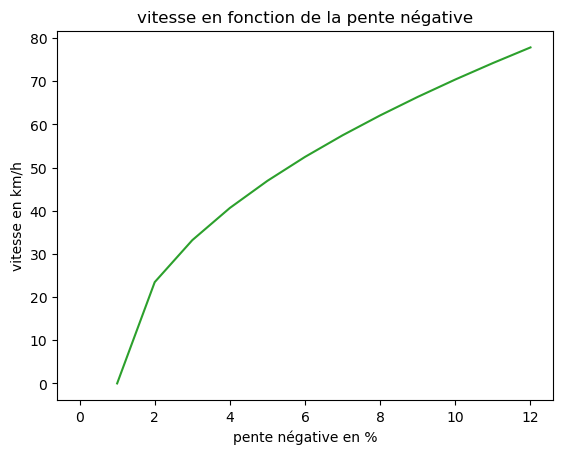

In [11]:
# graphe avec les valeurs des pentes en valeurs absolues

plt.plot(2,1,1)
x = abs(np.loadtxt("vitesse_en_fonction_une_pente_négative.txt", usecols= 0, delimiter=" "))
y = np.loadtxt("vitesse_en_fonction_une_pente_négative.txt", usecols= 1 , delimiter=" ")
plt.plot(x,y)
plt.xlabel("pente négative en %")
plt.ylabel("vitesse en km/h")
plt.title("vitesse en fonction de la pente négative")


**1-8.**   ****** Pour aller plus loin ****** 

Utilisant "numpy.interp", interpoler la courbe précédente en considérant 150 points entre 0 et 12 %, puis comparer le résultat de l'interpolation aux points du fichier de données et à la fonction théorique (i.e. vitesse de descente théorique). Commenter.

Text(0.5, 0, 'pente négative en %')

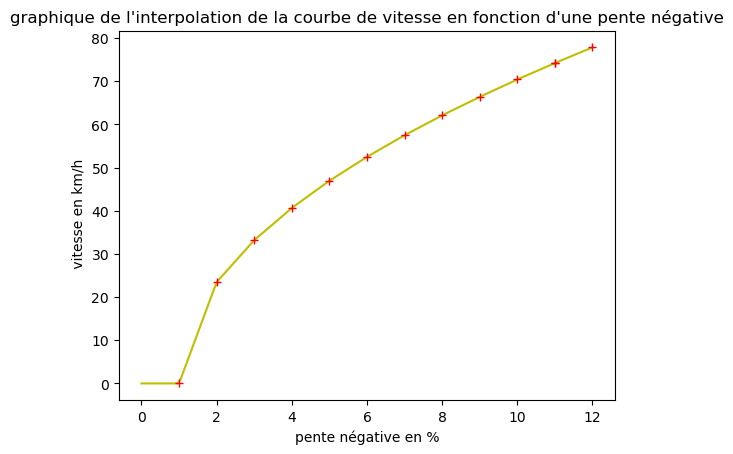

In [13]:
# x: intervalle à laquelle on s'intéresse
x=np.linspace(0,12,150)

# xp et yp liste de réels décrivant la courbe précédente
xp=abs(np.loadtxt("vitesse_en_fonction_une_pente_négative.txt", usecols= 0, delimiter=" "))
yp=np.loadtxt("vitesse_en_fonction_une_pente_négative.txt", usecols= 1 , delimiter=" ")

# y: interpolation
y= np.interp(x,xp,yp)

# Tracé de la courbe
plt.plot(x,y,"y-")
plt.plot(xp,yp,"r+")
plt.title("graphique de l'interpolation de la courbe de vitesse en fonction d'une pente négative")
plt.ylabel(" vitesse en km/h")
plt.xlabel("pente négative en %")



Votre commentaire sur l'interpolation:
on peut obeserver que les pentes entre 0 et -1 % n'ont pas de conséquence sur la vitesse, la vitesse reste constante.
on remarque également la vitesse augmente en fonction de la pente, plus la pente est négative plus la vitesse est grande. De plus, la variation d'augmentation de la vitesse entre les pentes (par exemple de -1% et -2% ou de -5% à -6%) devient de plus en plus petite avec les pentes qui deviennent de plus négatif.

En conclusion, la vitesse augmente avec la pente ( cas des  pentes négatives) et cette augmentation de vitesse diminue avec la diminution de l'inclinaison de la pente.


**1-9.**   Des mesure de vitesse de descente ont été effectuées pour le même cycliste avec le même vélo (M=85 kg) mais dans des conditions différentes (les paramètres beta et alpha sont différents de ceux précédents).
Le fichier "Nouvelle-vitesse-fonction-pente.txt" donne les valeurs de vitesse (en km/h) pour différentes pentes descendantes p (en %) de la route.
Tracer le graphe de la vitesse au carré en fonction de p. 


Text(0.5, 1.0, 'vitesse au carré en fonction de la pente')

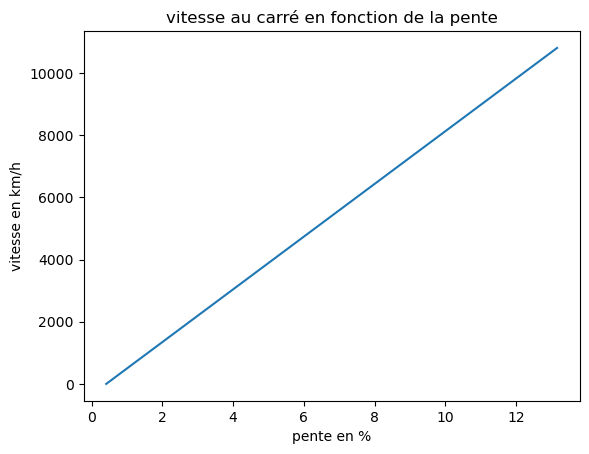

In [14]:
x = np.loadtxt("Nouvelle-vitesse-fonction-pente.txt", usecols= 0, delimiter=" ")
y = np.loadtxt("Nouvelle-vitesse-fonction-pente.txt", usecols= 1 , delimiter=" ")
plt.plot(x,y**2)
plt.xlabel("pente en %")
plt.ylabel("vitesse en km/h")
plt.title("vitesse au carré en fonction de la pente")


**1-10.**   En utilisant "numpy.polyfit", déterminer les paramètres beta et alpha ayant conduit aux vitesses mesurées.
Faire un nouveau graphe montrant l'ajustement aux données.

[ 847.38461538 -347.42769231]
-beta/alpha= -3.15384615384614
-1/alpha= 7.692307692307692
alpha= 0.13
beta= 0.4099999999999982


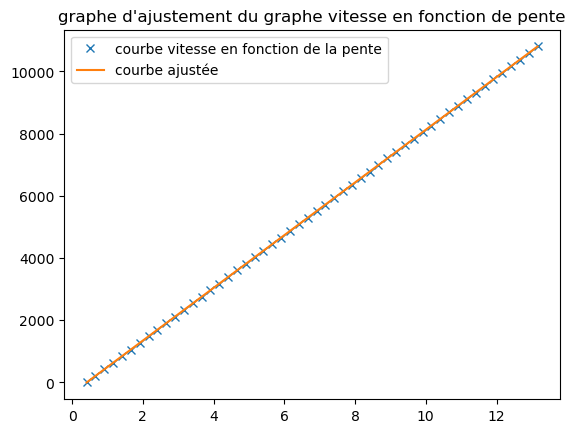

In [15]:
x = np.loadtxt("Nouvelle-vitesse-fonction-pente.txt", usecols= 0, delimiter=" ")
y = np.loadtxt("Nouvelle-vitesse-fonction-pente.txt", usecols= 1 , delimiter=" ")
y1 =y**2
a = np.polyfit(x,y1,1)
print(a)

z=a[0]*x + a[1]
# Tracé de la courbe
plt.plot(x,y1,"x", label = "courbe vitesse en fonction de la pente")
plt.plot(x,z, label="courbe ajustée")
plt.title("graphe d'ajustement du graphe vitesse en fonction de pente")
plt.legend()

#-beta/alpha=(a[1]*360*250)/( M * g * 11664)
print("-beta/alpha=",(a[1]*360*250)/( M * g * 11664))
#-1/alpha=(a[0]*360*250)/( M * g * 11664)
print("-1/alpha=",(a[0]*360*250)/( M * g * 11664))
# alpha=-( M * g * 11664)/(a[0]*360*250)
print("alpha=",( M * g * 11664)/(a[0]*360*250))
# beta=(-beta/alpha)*alpha
print("beta=",(a[1]*360*250)/( M * g * 11664)*(-( M * g * 11664)/(a[0]*360*250)))

**1-11.**   ******  Pour aller plus loin ****** Question à n'aborder qu'en toute fin de projet, si le coeur vous en dit !

Nous reprenons maintenant les conditions beta=1 , M=85 kg, alpha=0.2 S.I.

Nous souhaitons connaître la vitesse v à laquelle doit évoluer le cycliste sur des routes de différentes pentes (de -12 à 12 %) pour conserver une puissance constante, par exemple P=100 S.I.
La question revient à déterminer les zéros, c'est-à-dire les racines d'un polynome d'ordre 3 ($ax^{3}+bx^{2}+cx^{1}+d=0$). 

Utilisant "fsolve" de "scipy.optimize", déterminer les différentes vitesses correspondant aux différentes pentes (par pas de 1%),
 pour que la puissance développée soit toujours égale à 100 S.I.

Conseils: On procédera en quatre étapes. 

- 1) On tracera tout d'abord les courbes de la puissance en fonction de la vitesse pour les pentes -6, 0, et 6% afin de déterminer visuellement les vitesses correspondant à une puissance de 100 S.I.

- 2) On déterminera ensuite par "fsolve" dans le cas des pentes 0 et 6 % les vitesses exactes pour une puissance P de 100 S.I. 

- 3) Dans le cas d'une pente négative (- 6 %), la racine fournie par "fsolve" est négative (testez le !). Il faut donc écrire ici quelques lignes de code poussant à la recherche de la racine
positive.

- 4) Une fois que vous aurez déterminé la méthode pour extraire la bonne racine positive, vous pourrez écrire le code complet permettant de déterminer la vitesse correspondant à une puissance de 100 S.I., la pente variant entre -12 et 12 %. 
Vous pourrez ensuite visualiser le résultat en traçant la vitesse en fonction de la pente, pour P = 100 S.I.

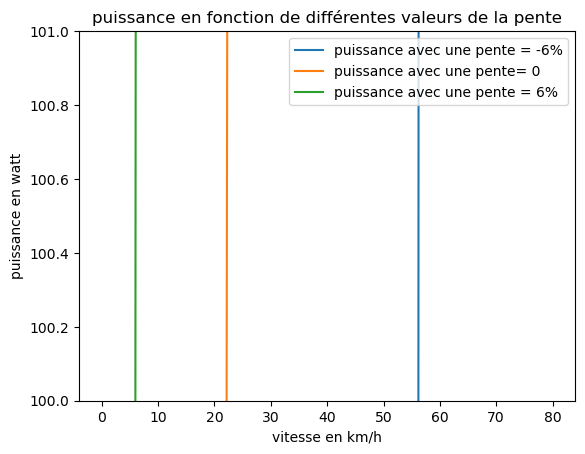

In [17]:

#étape 1 :

#graphe de puissance(v) avec les pentes -6,0,6%

a= ((beta -6) * M * g * v) / 360 + ((250/11664) * alpha * v**3) #puissance en fonction d'une pente=-6%
   
b = ((beta + 0) * M * g * v) / 360 + ((250/11664) * alpha * v**3)#puissance en fonction d'une pente=0%
    
c = ((beta + 6) * M * g * v) / 360 + ((250/11664) * alpha * v**3)#puissance en fonction d'une pente=6%


v = np.linspace(0,80,20)
plt.plot(v, a, label = "puissance avec une pente = -6%")
plt.plot(v, b, label = "puissance avec une pente= 0")
plt.plot(v, c, label = "puissance avec une pente = 6%")
plt.title("puissance en fonction de différentes valeurs de la pente")
plt.xlabel("vitesse en km/h")
plt.ylabel("puissance en watt")
plt.ylim(100,101)
plt.legend()

# visuellement,on a 6 km/h pour la pente de 6%, 22 km/h pour 0% et 56 km/h pour -6%.


In [19]:
# étape 2 :

from scipy.optimize import fsolve

#cas p=6%

def f1(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 6) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


x1 = fsolve(f1,50)
print(x1)

#cas p=0%

def f2(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return (((beta + 0) * M * g * v) / 360 + ((250/11664) * alpha * v**3))-100

x2 = fsolve(f2,0)
print(x2)

# étape 3:

# cas p=-6%

def test(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return (((beta -6) * M * g * v) / 360 + ((250/11664) * alpha * v**3))-100

xtest = fsolve(test,20)
print(xtest)

def f3(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return (((beta -6) * M * g * v) / 360 + ((250/11664) * alpha * v**3))-100

x3 = fsolve(f3,55) # conclusion: 2e argument de fsolve doit être une valeur proche de la racine
print(x3)



[5.99455027]
[22.27824482]
[-8.71056852]
[56.28884275]


[[79.69636728]
 [76.24922359]
 [72.65186125]
 [68.88435628]
 [64.92242408]
 [60.73620985]
 [56.28884275]
 [51.5350627 ]
 [46.42121165]
 [40.89119224]
 [34.91364755]
 [28.57321894]
 [22.27824482]
 [16.84075522]
 [12.83734952]
 [10.11808088]
 [ 8.26554276]
 [ 6.95693874]
 [ 5.99455027]
 [ 5.26107017]
 [ 4.68513655]
 [ 4.22163421]
 [ 3.8409151 ]
 [ 3.5227974 ]
 [ 3.25311061]]


Text(0.5, 0, 'pente en %')

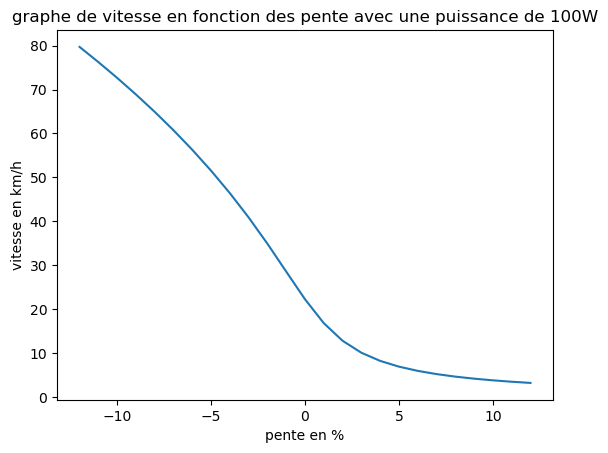

In [20]:

#la vitesse correspondant à une puissance de 100 S.I. avec la pente variant entre -12 et 12 %

#pente_positif=[0,1,2,3,4,5,6,7,8,9,10,11,12]
#pente_négatif=[-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]


# les fonctions pour les pentes positifs avec notation f + valeur de l'inclinaison de la pente

def f0(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 0) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f1(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 1) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f2(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 2) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f3(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 3) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f4(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 4) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f5(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 5) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f6(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 6) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f7(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 7) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f8(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 8) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


def f9(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 9) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


def f10(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 10) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f11(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 11) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f12(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta + 12) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

# les fonctions pour les pentes négatives en notation f + "_" pour le moins + valeur de l'inclainaison de la pente

def f_1(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta-1) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_2(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -2) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_3(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta - 3) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_4(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -4) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_5(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta-5) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_6(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -6) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


def f_7(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -7) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


def f_8(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -8) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_9(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta-9) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_10(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -10) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_11(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -11) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100

def f_12(v):
    M = 85
    beta = 1
    alpha = 0.2
    g = 10
    return ((beta -12) * M * g * v) / 360 + ((250/11664) * alpha * v**3)-100


vitesses = np.array([fsolve(f_12,70), fsolve(f_11,70),fsolve(f_10,70),fsolve(f_9,60),fsolve(f_8,60),  fsolve(f_7,60), fsolve(f_6,60),fsolve(f_5,50),fsolve(f_4,40), fsolve(f_3,30),fsolve(f_2,20),fsolve(f_1,10),fsolve(f0,0), fsolve(f1,0),fsolve(f2,0), fsolve(f3,0),fsolve(f4,0), fsolve(f5,0),fsolve(f6,0), fsolve(f7,0),fsolve(f8,0), fsolve(f9,0),fsolve(f10,0), fsolve(f11,0), fsolve(f12,0)])
print(vitesses)
abcisse= [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12]

plt.plot(abcisse,vitesses)
plt.title("graphe de vitesse en fonction des pente avec une puissance de 100W")
plt.ylabel("vitesse en km/h")
plt.xlabel("pente en %")



**1-12.**   ******  Pour aller plus loin ****** Question à aborder en vue d'enrichir votre soutenance orale finale (cf fichier du sujet). Il n'y a pas de code à écrire !!!

Un physicien ou une physicienne écrirait plutôt la formule de la puissance selon:
    
    P = (mu + tan(theta)) cos(theta) M g v + alpha v^3                 (2)
    avec v la vitesse en m/s.
    
    mu est le coefficient de frottement dynamique (avec glissement) vu en cours et theta l'angle d'inclinaison de la route avec l'horizontale.
    alpha est un coefficient qui peut s'écrire en fonction du coefficient de trainée aérodynamique Cx.
    
Lister les différentes forces s'exerçant sur le système {cycliste+vélo}, faire un schéma et 
retrouver la formulation (2) de P. 



In [ ]:
Cette question doit être abordée en dehors du Notebook !!!
(et en particulier pour votre soutenance orale de fin de semestre)
Un schéma "à la main" sur "feuille de papier" (puis photo.png) est amplement suffisant.

## 2. Interlude: la montée "mythique" de l'Alpe d'Huez

Gravir l’Alpe d’Huez à vélo constitue pour les amoureux du cyclisme un objectif des plus enviables si ce n’est un « sine qua non » : 
    21 virages à négocier avec sur certains tronçons une pente allant jusqu’à  11.5 %. 
    Examinons le profil de la montée depuis Bourg-d’Oisans jusqu’au sommet, puis intéressons-nous aux temps d’ascension de coureurs professionnels lors d’un contre-la-montre du Tour de France. 



###### **2-1.**  Nous donnons ci-dessous la liste des pentes moyennes successives par kilomètre mesuré à l’horizontale, sauf la dernière valeur qui ne concerne que 800 m. 

Liste des pentes (en %) = [10.4,10,8.5,9,8,7.5,9.5,8,6.5,11.5,9,5,5,5.5]

Distance correspondante à l’horizontale (en km) = [0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-13.8]

Noter que le dernier tronçon à 5.5 % ne couvre que 800 m contre 1 km pour tous les autres tronçons. 
La figure 3 (cf fichier du sujet !!!) précise la situation pour les deux premiers km à l'horizontale.


**2-2-a.** Supposant que la dernière valeur de pente concerne 1 km, calculer la pente moyenne de la montée de l'Alpe et l’écart-type (on définira auparavant ces deux entités).
Comment donner la pente moyenne en écriture "condensée"?

In [36]:
# Code ici pour le calcul

#avec numpy

a = [10.4, 10, 8.5, 9,8, 7.5, 9.5, 8, 6.5, 11.5, 9, 5, 5, 5.5]

moy = np.mean(a) 
écart_type = np.std(a); print("Ecart-type =", écart_type)
print("Moyenne avec avec un écart-type=", moy,"+/-", écart_type)
#avec les formules

import math as m 

moyenne = (10.4 + 10 + 8.5 + 9 + 8 + 7.5 + 9.5 + 8 + 6.5 + 11.5 + 9 + 5 + 5 + 5.5)/14
Ecart_type = m.sqrt(((10.4-8.1)**2 + (10-8.1)**2 + (8.5-8.1)**2 + (9-8.1)**2 + (8-8.1)**2 + (7.5-8.1)**2 + (9.5-8.1)**2 + (8-8.1)**2  + (6.5-8.1)**2  + (11.5-8.1)**2  + (9-8.1)**2  + (5-8.1)**2  + (5-8.1)**2  + (5.5-8.1)**2 )/14)
print("moyenne avec un ecart-type avec la formule =", moyenne, "+/-", Ecart_type)



Ecart-type = 1.947892634178207
Moyenne avec avec un écart-type= 8.1 +/- 1.947892634178207
moyenne avec un ecart-type avec la formule = 8.1 +/- 1.947892634178207


**2-2-b.** Faire l'histogramme des pentes (mode automatique). 
 Choisir ensuite un nombre de classes différent (par ex. 3), tracer l'histogramme correspondant et comparer au précédent.
Trier les différentes valeurs de pente; l'histogramme avec 3 classes est-il conforme à ce tri ?

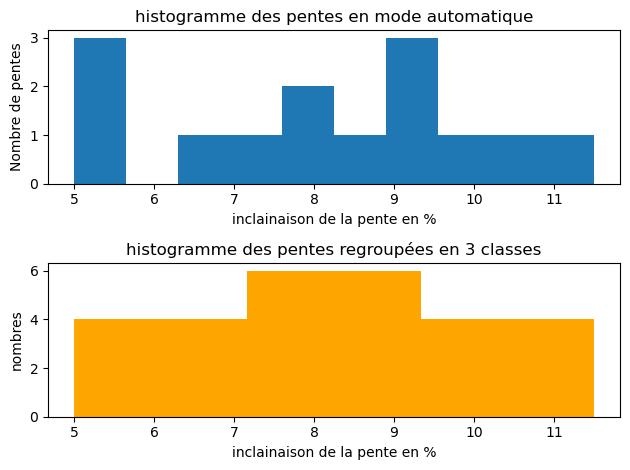

In [37]:
# hitogramme des pentes en mode automatique
x = [10.4, 10, 8.5, 9, 8, 7.5, 9.5, 8, 6.5, 11.5, 9, 5, 5, 5.5]

# histogramme par voie automatique
plt.subplot(2, 1, 1)
plt.hist(x)
plt.title("histogramme des pentes en mode automatique")
plt.xlabel("inclainaison de la pente en %")
plt.ylabel("Nombre de pentes")

# hitogramme des pentes en 3 classes 
plt.subplot(2, 1, 2)
plt.hist(x, bins = 3, color = "orange")
plt.title("histogramme des pentes regroupées en 3 classes")
plt.xlabel("inclainaison de la pente en %")
plt.ylabel("nombres")


plt.tight_layout()


**2-2-c.**  Etablir le profil de la montée de l’Alpe, c’est-à-dire l’évolution de l’altitude en fonction de la distance prise à l’horizontale depuis Bourg-d’Oisans (i.e. on donnera l'altitude pour chaque kilomètre à l'horizontale, depuis le kilomètre zéro). L’altitude de départ est 725 m. 
On précisera l'altitude atteinte au sommet.


In [38]:
# Code ici
# Votre profil doit vous donner l'altitude au sommet référencée pour l'Alpe d'Huez... 

#altitude = (p(%)/100)*d

pente = [10.4, 10, 8.5, 9, 8, 7.5, 9.5, 8, 6.5, 11.5, 9, 5, 5, 5.5]

def altitude_par_pente(pente):
    s=725
    l=[725]
    for i in pente:
        if i != pente[-1]:
            s=s+(i/100)*1000
            l.append(s)
        else:
            s=s+(i/100)*800
            l.append(s)
    return l

print(altitude_par_pente(pente))

# altitude du sommet

sommet = 725+(10.4/100)*1000+(10/100)*1000+(8.5/100)*1000+(9./100)*1000+(8./100)*1000+(7.5/100)*1000+(9.5/100)*1000+(8/100)*1000+(6.5/100)*1000+(11.5/100)*1000+(9/100)*1000+(5/100)*1000+(5/100)*1000+(5.5/100)*800

print("altitude du sommet =", sommet, "m")

[725, 829.0, 929.0, 1014.0, 1104.0, 1184.0, 1259.0, 1354.0, 1434.0, 1499.0, 1614.0, 1704.0, 1754.0, 1804.0, 1848.0]
altitude du sommet = 1848.0 m


**2-2-d.**  Tracer sur un même graphe le profil de la montée de l’Alpe, ainsi que le profil moyen.

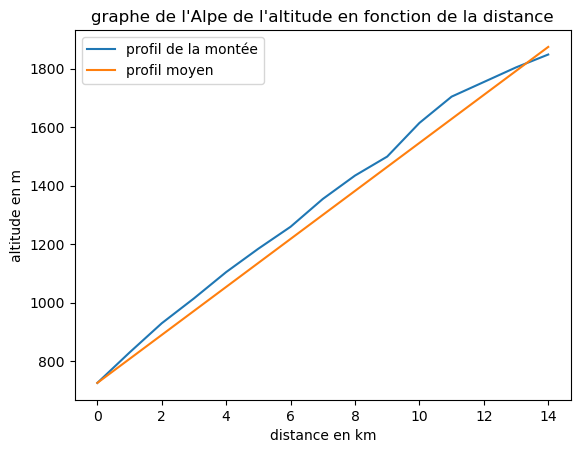

In [40]:
##profil de la montée

plt.plot(altitude_par_pente(pente), label ="profil de la montée")
plt.title("graphe de l'Alpe de l'altitude en fonction de la distance")
plt.xlabel("distance en km")
plt.ylabel("altitude en m")
plt.legend()

##profil de l'Alpe d’Huez

x = np.linspace(0,14,14)

# moyenne des coordonnées du début jusqu'au milieux et du milieux jusqu'à la fin
x1 = [0, 1, 2, 3, 4, 5, 6, 7]; y1 = [725, 829.0, 929.0, 1014.0, 1104.0, 1184.0, 1259.0, 1354.0]; x2 = [8, 9, 10, 11, 12, 13, 14]; y2 = [1434.0, 1499.0, 1614.0, 1704.0, 1754.0, 1804.0, 1848.0]
X1 = sum(x1)/8 ; Y1 =sum(y1)/8 ; X2 = sum(x2)/7;  Y2 = sum(y2)/7

# expression de la courbe affine
a = (Y2-Y1)/(X2-X1) # coefficient directeur de la droite affine (y2-y1)/(x2-x1)
b = 725
y = a*x+ b # la fonction affine 

#graphe
plt.plot(x, y,label = "profil moyen")
plt.xlabel("distance en km")
plt.ylabel("altitude en m")
plt.legend()




**2-3.**  Le fichier « Fichier-temps-coureurs-Alpe » donne les 19 meilleurs temps (en min (‘) sec(‘’)) réalisés par des cyclistes professionnels pour gravir l’Alpe d’Huez lors d’un contre-la-montre. La première colonne donne le classement, la deuxième le temps en min, la troisième le temps restant en sec. 

**2-3-a.**  Lister à l'écran les temps d'ascension en sec. 

Faire un histogramme des temps d’ascension. 

On comparera ensuite l’histogramme obtenu par voie automatique à celui  obtenu avec un choix manuel de largeur de classe égal à 100 sec.
On donnera un titre aux axes et à l'histogramme.

 temps en seconde =  [2392.0, 2395.0, 2453.0, 2458.0, 2458.0, 2461.0, 2514.0, 2514.0, 2514.0, 2530.0, 2548.0, 2583.0, 2633.0, 2637.0, 2642.0, 2670.0, 2750.0, 2780.0, 2843.0]


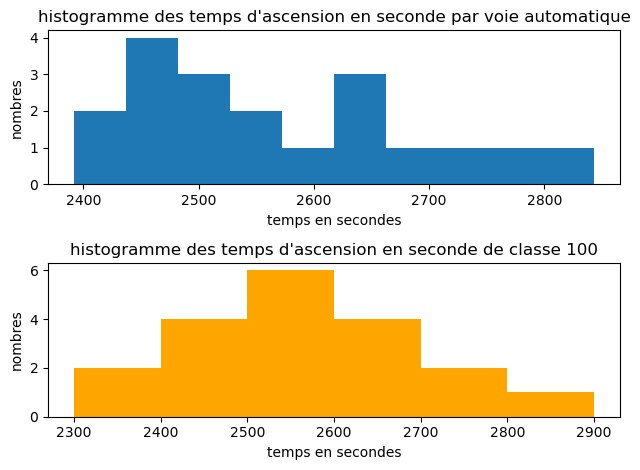

In [41]:
a = np.loadtxt( "Fichier-temps-coureurs-Alpe.txt")

#liste des temps avec une valeur en minute puis une valeur en seconde
b = [ 39., 52., 39., 55., 40., 53., 40., 58., 40., 58.,  41.,  1.,  41., 54.,41., 54., 41., 54., 42., 10., 42., 28., 43., 3., 43., 53., 43., 57., 44.,  2., 44., 30., 45., 50., 46., 20., 47., 23.]

temps_seconde = [b[0]*60+b[1], b[2]*60+b[3], b[4]*60+b[5], b[6]*60+b[7], b[8]*60+b[9], b[10]*60+b[11], b[12]*60+b[13], b[14]*60+b[15], b[16]*60+b[17], b[18]*60+b[19], b[20]*60+b[21], b[22]*60+b[23], b[24]*60+b[25] ,b[26]*60+b[27], b[28]*60+b[29], b[30]*60+b[31], b[32]*60+b[33], b[34]*60+b[35], b[36]*60+b[37]]
print(" temps en seconde = ", temps_seconde)

# histogramme des temps en ascension 

# histogramme voie automatique

plt.subplot(2,1,1)
plt.hist(temps_seconde)
plt.title("histogramme des temps d'ascension en seconde par voie automatique")
plt.xlabel("temps en secondes")
plt.ylabel("nombres")

# histogramme de classe de 100 secondes

plt.subplot(2,1,2)
plt.hist( temps_seconde, range = (2300,2900), bins = 6, color = "orange")
plt.title("histogramme des temps d'ascension en seconde de classe 100")
plt.xlabel("temps en secondes")
plt.ylabel("nombres")

plt.tight_layout()

# l'histogramme avec un choix manuel de classe égal à 10 est plus facile à lire comparé à l'histogramme par voie automatique


**2-3-b.**  Calculer  la moyenne des temps et l’écart-type ainsi que la vitesse moyenne en km/h des coureurs (prendre 13.8 km pour la distance parcourue). Déterminer également la puissance moyenne développée par les coureurs (utiliser l’équation (1) avec M=78 kg, beta= 1 , alpha=0.08 SI).

In [31]:
temps_seconde = [b[0]*60+b[1], b[2]*60+b[3], b[4]*60+b[5], b[6]*60+b[7], b[8]*60+b[9], b[10]*60+b[11], b[12]*60+b[13], b[14]*60+b[15], b[16]*60+b[17], b[18]*60+b[19], b[20]*60+b[21], b[22]*60+b[23], b[24]*60+b[25] ,b[26]*60+b[27], b[28]*60+b[29], b[30]*60+b[31], b[32]*60+b[33], b[34]*60+b[35], b[36]*60+b[37]]

#moyenne
moyenne = np.mean(temps_seconde)
print("moyenne des temps =", moyenne, "s")

#écart-type
ecart_type = np.std(temps_seconde)
print("écart-type =", ecart_type, "s")

#vitesse moyenne des coureurs en km/h 
print("vitesse moyenne =", 13.8/(moyenne/3600), "km/h")

#puissance moyenne

M = 78
beta = 1
alpha = 0.08
g = 10
v = 19.35253716043055
pente = np.mean([10.4, 10, 8.5, 9, 8, 7.5, 9.5, 8, 6.5, 11.5, 9, 5, 5, 5.5])

P = ((beta + pente) * M * g * v) / 360 + ((250/11664) * alpha * v**3)

print("puissance =", P, "W")

moyenne des temps = 2567.1052631578946 s
écart-type = 125.47589189156369 s
vitesse moyenne = 19.35253716043055 km/h
puissance = 393.9953804139594 W


**2-4.**  ****** Pour aller plus loin ******  

Comparer l’histogramme obtenu avec le profil de densité de probabilité donné par une loi log-normale $f(t)$ de paramètres $\mu$ et $\sigma$, où $\mu$ est l’espérance et $\sigma$ l’écart-type du logarithme de la variable temps $t$ :

$f(t)$ = $1/ ( t \sigma \sqrt{2\pi} )$   exp[- (ln( $t$ )-$\mu$)$^{2}$ / (2$\sigma$$^{2}$)]  
    
On donne $\mu$=7.85 et $\sigma$=0.051.
On précisera le lien entre l’espérance $\mu$ et la moyenne des temps.


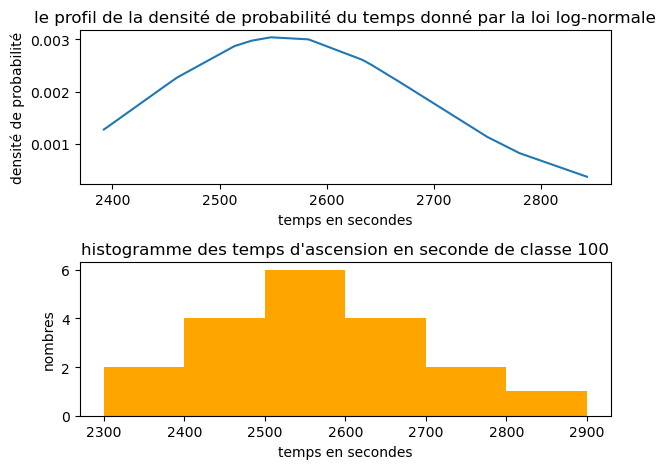

In [42]:
t=[2392.0, 2395.0, 2453.0, 2458.0, 2458.0, 2461.0, 2514.0, 2514.0, 2514.0, 2530.0, 2548.0, 2583.0, 2633.0, 2637.0, 2642.0, 2670.0, 2750.0, 2780.0, 2843.0]

def f(t):
    l=[]
    u=7.85
    o=0.051
    for i in t:
        a=(1/(i*o*m.sqrt(2*m.pi)))*m.exp((-(m.log(i)-u)**2/(2*o**2)))
        l.append(a)
    return l

plt.subplot(2,1,1)
plt.plot(t,f(t))
plt.title("le profil de la densité de probabilité du temps donné par la loi log-normale")
plt.xlabel("temps en secondes")
plt.ylabel("densité de probabilité")

plt.subplot(2,1,2)
plt.hist( temps_seconde, range = (2300,2900), bins = 6, color = "orange")
plt.title("histogramme des temps d'ascension en seconde de classe 100")
plt.xlabel("temps en secondes")
plt.ylabel("nombres")

plt.tight_layout()



commentaire: 
On peut observer que la courbe de densité de probabilité peut ajuster l'histogramme. D'après l'histogramme, il y a une forte concentration de coureurs qui font un temps entre 2500 et 2600 secondes, ce qui est correspond bien à ce que montre la courbe.

L'espérence est la moyenne des valeurs de la densité de probabilité. On remarque que le maximum global de la courbe est vers 2550 secondes, une valeur proche de la moyenne des temps (2567.10s) retrouvée à la question 2.3.b. On en déduit que l'espérence d'une graphe de densité de probabilité et la moyenne des valeurs sont identiques.


## 3. La transmission à vélo: une histoire de couple

## 3-A. Le pédalage

Le mouvement de pédalage a fait l'objet d'un nombre considérable d'études. 
On se limite ici dans un premier temps à l'étude de la force exercée par le cycliste avec sa jambe droite
au cours d'un demi-tour de pédale, et du moment résultant de cette force.
On suppose que la force peut s'écrire selon:

$\vec{F}$ = +- H $sin^{(n-1)}$($\theta$) $\vec{i}$ + V $cos^{(n-1)}$($\theta$) $\vec{j}$

où     

- $\vec{i}$, $\vec{j}$ sont deux vecteurs unitaires portés respectivement par l'horizontale (vers la droite) et la verticale descendante (vers le bas)
    
- H, V sont respectivement la composante horizontale et verticale de la force
    
- $\theta$ est l'angle que fait la manivelle par rapport à l'horizontale
    
- n est un coefficient généralement compris entre 2 et 3.

- le signe +- dépend de n et $\theta$.

La longueur de la manivelle est notée L (L est la distance entre le centre du plateau du pédalier et le centre de la pédale où la force s'applique).
Au cours d'un temi-tour de pédale, l'angle theta varie entre -pi/2 et pi/2. 



**3-A-1.**  Définir le vecteur moment $\vec{M}$ de la force $\vec{F}$ par rapport au centre du pédalier, à l'angle theta. 
On prendra soin de définir auparavant le vecteur $\vec{OP}$ où $P$ est le point d'application de la force; il est recommandé de faire un schéma de $\vec{F}$ et $\vec{OP}$.
Procéder ensuite au calcul de vecteur moment $\vec{M}$ et à celui de sa norme M.


In [ ]:
# Ecrivez les formules sur papier et montrez les à votre enseignant
OP = 

M=

M = 

**3-A-2.** On considère dorénavant que 
M = L H |$sin^{(n)}$($\theta$)|  + L V $cos^{(n)}$($\theta$) 
Tracer le moment M - appelé communément couple - en fonction de l'angle theta, dans le cas n = 2. 
Spécifier les valeurs minimale et maximale de M (et les géométries correspondantes).

On prendra H = 55 N et V = 300 N. La longueur L vaut 17 cm. 

Note: Pour la figure, on prendra le soin d'utiliser des degrés pour l'angle.

Text(0, 0.5, 'LE MOMENT')

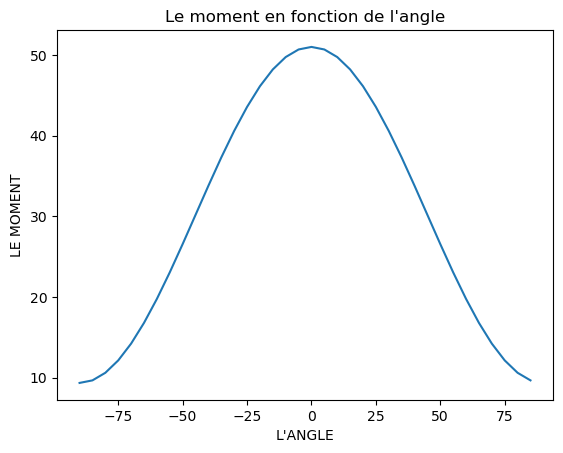

In [44]:
import math as m
H = 55 ; V = 300 ; L = 0.17 
def moment(t):
    M = L*H*(np.sin(t*(np.pi/180))**2)+L*V*(np.cos(t*(np.pi/180))**2) #Formule du moment
    return M
t = np.arange(-90,90,5)
plt.plot(t,moment(t)) # Tracer la courbe
plt.title("Le moment en fonction de l'angle")
plt.xlabel("L'ANGLE")
plt.ylabel("LE MOMENT")

La valeur minimale de M est de -10 Nm
La valeur maximale de M est de 50 Nm


**3-A-3.** Faire une nouvelle figure, représentant le moment en fonction de l'angle, 
dans les trois situations (n = 2, n = 2.5, n = 3). Note: Pour la figure, on prendra le soin d'utiliser des degrés pour l'angle.

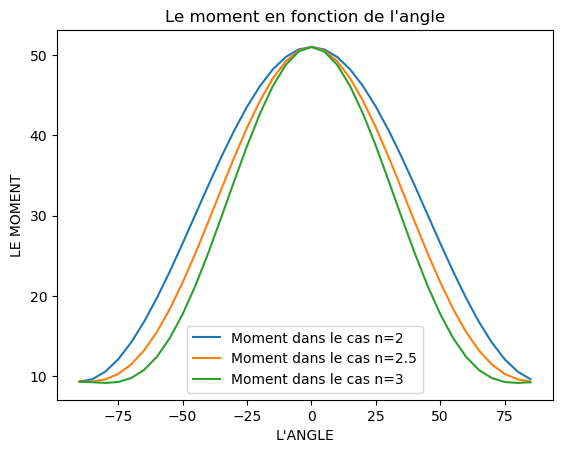

In [47]:
def moment(t):
    M = L*H*(np.sin(t*(np.pi/180))**2)+L*V*((np.cos(t*(np.pi/180))**2))   # Dans le cas de n = 2
    return M
def moment1(t):
    M1 = L*H*((abs(np.sin(t*(np.pi/180)))**2.5))+L*V*((abs(np.cos(t*(np.pi/180))**2.5)))  # Dans le cas de n = 2.5
    return M1
def moment2(t):
    M2 = L*H*((abs(np.sin(t*(np.pi/180)))**3))+L*V*((abs(np.cos(t*(np.pi/180)))**3))   # Dans le cas de n = 3
    return M2
t = np.arange(-90,90,5)
plt.plot(t,moment(t),label="Moment dans le cas n=2")
plt.plot(t,moment1(t),label="Moment dans le cas n=2.5")
plt.plot(t,moment2(t),label="Moment dans le cas n=3")
plt.title("Le moment en fonction de l'angle")
plt.xlabel("L'ANGLE")
plt.ylabel("LE MOMENT")
plt.legend()
# On observe que les moments sont tous égaux quand l'angle est égal a 0


**3-A-4.** ****** Pour aller plus loin ****** Calculer le travail de la force au cours d'un demi-tour, dans le cas n=2. On pourra utiliser "quad" de "scipy.integrate".

**3-A-5.**  ****** Pour aller plus loin ****** Que vaut le moment moyen dans le cas n=2 ?

**3-A-6.** ****** Pour aller plus loin ****** Que valent les moments moyens dans le cas n=2.5 et dans le cas n=3 ?

Représenter les valeurs moyennes sur le graphe de la question 3-A-3. Quelle est la situation correspondant au pédalage le plus efficace ?

## 3-B. La transmission

(partie avec très peu de code, simple mathématiquement et très guidée, car conceptuellement difficile)

Le mouvement de rotation de la manivelle par le cycliste va entraîner le mouvement de rotation de la roue arrière du vélo via "la transmission", composée du plateau (solidaire de la manivelle), de la chaîne et du pignon arrière (solidaire de la roue). 
Le pédalier et la chaîne de transmission sont représentés en figure 4 (cf fichier du sujet).

Lorsque le cycliste exerce une force F sur la pédale, il fait tourner la manivelle, ce qui entraîne la rotation du plateau. La rotation du plateau entraîne la translation de la chaîne, qui elle-même entraîne la rotation du pignon arrière. Enfin, la rotation du pignon entraîne la rotation de la roue.



**3-B-1.** Considérant la situation de la figure 4, appelant F_pedale la force exercée sur la pédale, L la longueur de la manivelle, R_plateau le rayon du plateau, déterminer la force F_chaîne qui s'exerce sur la chaîne (au contact avec le haut du plateau). On considèrera l'égalité des moments de F_pedale et F_chaîne par rapport au centre du plateau. 


In [ ]:
F_chaîne= (L*F_pedale)/(-R_plateau)

**3-B-2.** Supposant que la tension sur la chaîne est uniformément répartie, déterminer la force F_roue qui s'exerce que la roue arrière. On appelera R_roue le rayon de la roue et R_pignon le rayon du pignon.


In [ ]:
F_roue= (R_pignon*F_chaine)/R_roue

**3-B-3.** Donner l'expression de la force motrice F_motrice nécessaire pour avancer à la vitesse v  (on utilisera l'expression de la puissance donnée en (1) (ou (2); le cycliste roule sur le plat). 

In [ ]:
F_motrice= (beta*M*g/360)+((250/11664)*alpha*v**2)

**3-B-4.** Assimilant F_roue à F_motrice, donner l'expression du moment M de la force F_pedale par rapport au centre du plateau en fonction de la vitesse v du vélo (on appelle aussi ce moment le couple moteur). 

In [ ]:
M = -R_plateau*((beta*M*g/360)+((250/11664)*aplha*v**2)*R_roue/R_pignon)

**3-B-5.** Votre expression de M_roue est-elle conforme à l'expression du couple moteur C_moteur donnée ci-dessous, où N1 est le nombre de dents du plateau et N2 le nombre de dents du pignon ?
(si oui, vous avez correctement raisonné) 

C_moteur =  (N1/N2)*R_roue* ((beta+p)M*g+alpha*v$^{2}$)

In [ ]:
Votre expression doit être conforme...
# l'expression est bien conforme car on a la meme dependance en vitesse dans les deux formules

**3-B-6.** Calculer C_moteur et F_pedale pour une vitesse v=33 km/h atteinte avec un braquet N1/N2=50/15, puis avec un braquet N1/N2=38/19. Commenter.
On prendra beta=0.01, pente=0, M=85 kg, alpha=0.2, R_roue= 334 mm (ie roue de 26'')

In [ ]:
Indication : Calculer la puissance dans les deux cas .... puis commenter...

**3-B-7.** Calculer la fréquence de pédalage en tours par minute (t/min) dans les deux cas précédents. Commenter. 

In [ ]:
# Question difficile à la limite du programme (il faut distinguer les vitesse de rotation du plateau et celle du pignon) )

In [ ]:
Commenter: ... (un commentaire sans calcul peut être proposé...)